Epoch 1/10
7/7 [==============================] - 6s 735ms/step - loss: 1.6705 - accuracy: 0.6550 - val_loss: 0.7101 - val_accuracy: 0.2400
Epoch 2/10
7/7 [==============================] - 7s 938ms/step - loss: 0.6685 - accuracy: 0.6300 - val_loss: 0.5103 - val_accuracy: 0.8600
Epoch 3/10
7/7 [==============================] - 4s 585ms/step - loss: 0.5236 - accuracy: 0.7750 - val_loss: 0.4029 - val_accuracy: 0.8600
Epoch 4/10
7/7 [==============================] - 5s 744ms/step - loss: 0.5413 - accuracy: 0.7750 - val_loss: 0.4412 - val_accuracy: 0.8600
Epoch 5/10
7/7 [==============================] - 5s 738ms/step - loss: 0.5048 - accuracy: 0.7750 - val_loss: 0.4323 - val_accuracy: 0.8600
Epoch 6/10
7/7 [==============================] - 5s 730ms/step - loss: 0.4951 - accuracy: 0.7750 - val_loss: 0.4618 - val_accuracy: 0.8600


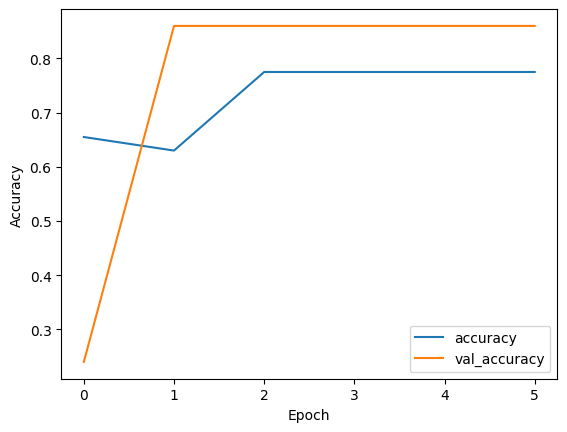

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

# Load preprocessed data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (toxic/non-toxic)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[early_stopping])

# Save the trained model
model.save('toxic_plant_classifier.h5')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
